## problem Statement:
- You are required to model the demand for shared bikes with the available independent variables. 
- It will be used by the management to understand how exactly the demands vary with different features. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [3]:
#Importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [4]:
# Loading data

bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# shape
bike_data.shape

(730, 16)

In [6]:
#df information
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# statistical information
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data cleaning

### checking for null values

In [8]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### there are no null values or missing values in the columns for the given data.

In [9]:
# checking for duplicate values
bike_data.drop_duplicates(subset=None,inplace=True)

-- No duplicate values reported

In [10]:
# checking for datatypes
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 97.0+ KB


In [11]:
# dteday the column whoch is date type is in object converting to date type
bike_data['dteday'] = bike_data['dteday'].astype('datetime64[ns]')

## checking and removing unwanted columns

- here if we see column instant is nothing but index and 
- date column also doesnt add any seperate value as we have year and weekday columns seperately
- also the columns casual and registered are any way added upto cnt so they can be removed


In [12]:
# creating new dataframe with removed columns

bike_data_new = bike_data.drop(['instant','dteday','casual','registered'],axis=1)

In [13]:
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bike_data_new.shape

(730, 12)

In [15]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


In [16]:
bike_data_new.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [17]:
# columns like 'season','mnth','weekday','weathersit' are categorical with numerical columns with categories more than two so theya re not binary hence can be converted to categorical columns with values

bike_data_new['weathersit'].replace({1:'clear',2:'Mist',3:'Light snow',4:'Heavy rain'},inplace = True)
bike_data_new.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_data_new.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)
bike_data_new.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace=True)

In [18]:
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## EDA

## univariate Analysis

In [20]:
# Numerical Analysis for outliers

In [21]:
# numerical columns are 
# ['temp','atemp','hum','windspeed']

# plotting subplots of boxplots for all numerical columns

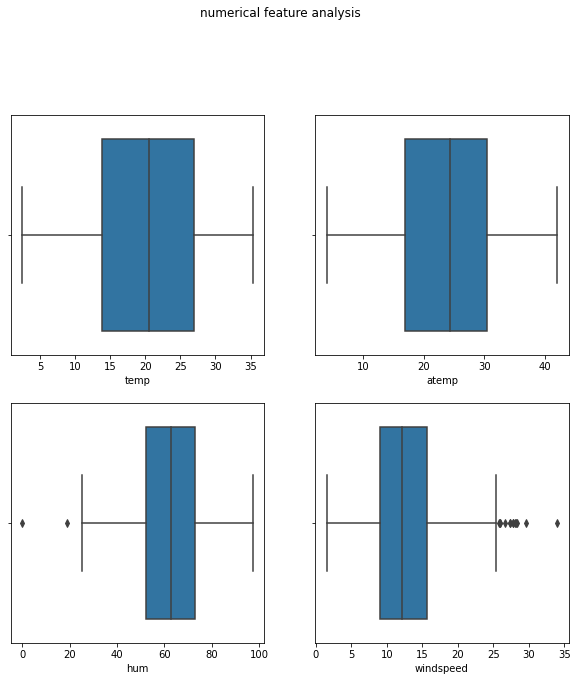

In [22]:
plt.figure(figsize=(10,15))
plt.suptitle("numerical feature analysis")

plt.subplot(3,2,1)
sns.boxplot(data=bike_data_new,x='temp')

plt.subplot(3,2,2)
sns.boxplot(data =bike_data_new,x='atemp')

plt.subplot(3,2,3)
sns.boxplot(data=bike_data_new,x='hum')

plt.subplot(3,2,4)
sns.boxplot(data =bike_data_new,x='windspeed')

plt.show()

In [23]:
# as we can see there are not much ouliers in any of the numerical features

## Categorical Variables

In [24]:
#['season','mnth','weekday','weathersit']

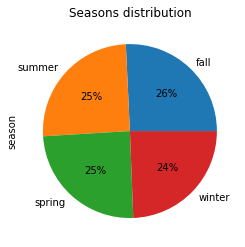

In [25]:
bike_data_new.season.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.title("Seasons distribution")
plt.show()

In [26]:
# as we see above all the four seasons are almost equally in distribution.

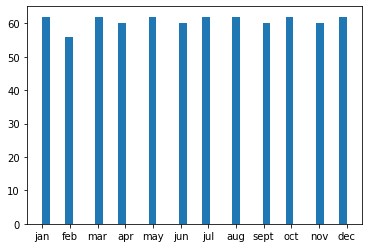

In [27]:
plt.hist(bike_data_new.mnth,bins=40)
plt.show()

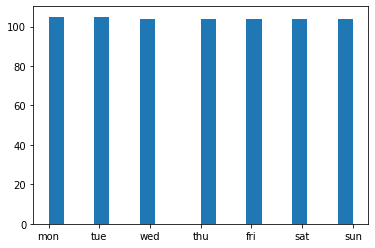

In [28]:
plt.hist(bike_data_new.weekday,bins=20)
plt.show()

In [29]:
# same goes for the 'months' and weak days , the are also equally distrubuted in frequency

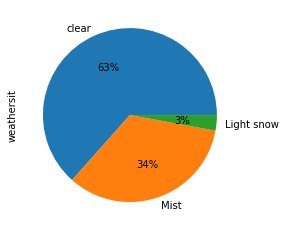

In [30]:
bike_data_new.weathersit.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.show()

In [31]:
# Here if we see the weather-sit clear is more in frequency
# here weathersit clear is -  1: Clear, Few clouds, Partly cloudy, Partly cloudy

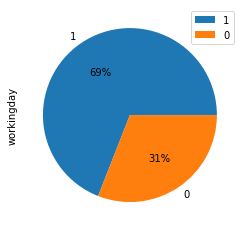

In [32]:
bike_data_new.workingday.value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")
plt.legend()

- here 1 is working day and 0 is not a working day
- hence woring day has more frequency than non working days

## bivariate Analysis

In [33]:
#how numerical var are relating to target variable 'cnt'

In [34]:
# we can see pairplot between the numerical columns

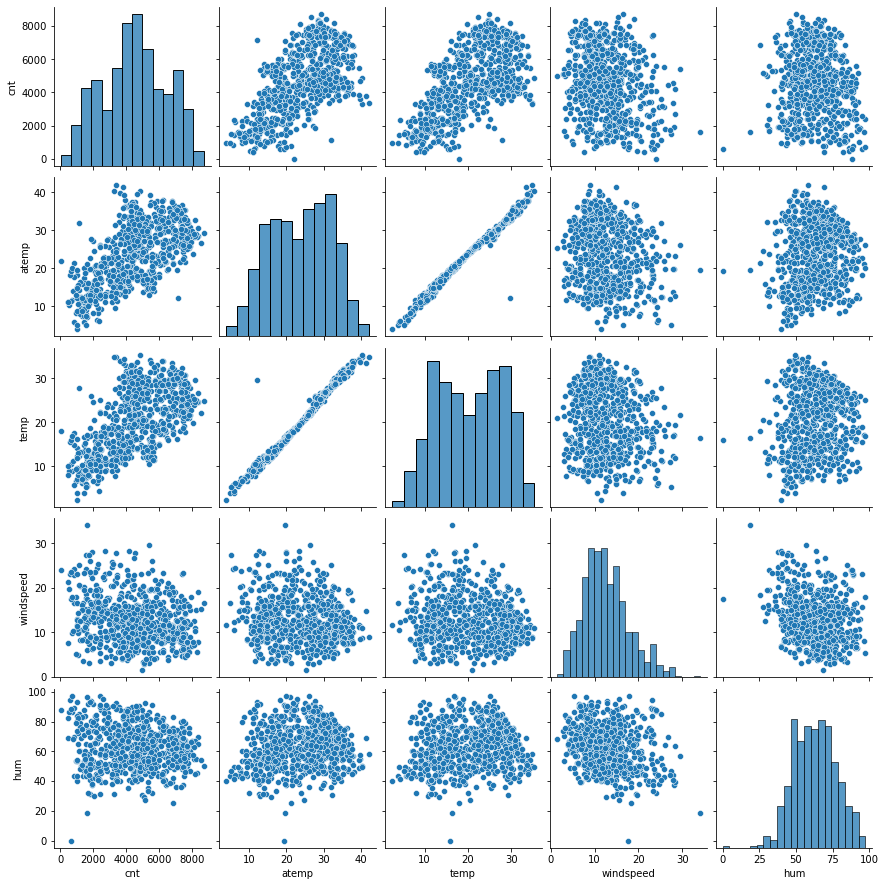

In [35]:
sns.pairplot(data = bike_data_new,vars={'temp','atemp','hum','windspeed','cnt'})
plt.show()

In [36]:
# here if we see the numerical columns with 'cnt' target variable
# the variables temp , atemp has a linear relation ship with cnt other are doesnt explain anything much

# 'cnt' vs Categorical variables

In [37]:
# cnt vs season

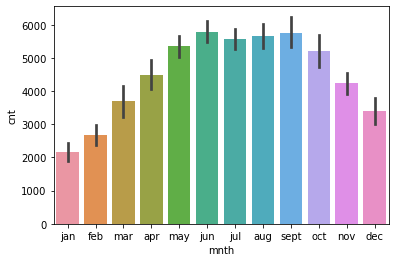

In [38]:
sns.barplot(x="mnth", y="cnt", data=bike_data_new)
plt.show()

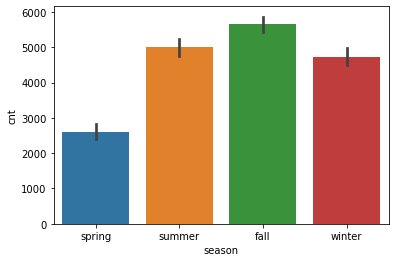

In [39]:
sns.barplot(x="season", y="cnt", data=bike_data_new)
plt.show()

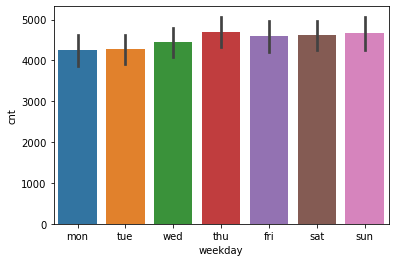

In [40]:
sns.barplot(x="weekday", y="cnt", data=bike_data_new)
plt.show()

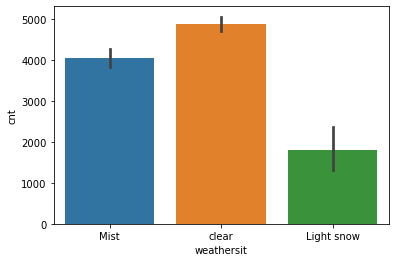

In [41]:
sns.barplot(x="weathersit", y="cnt", data=bike_data_new)
plt.show()

## The observation for the above graphs are as below:
- here for weathersit with clear- Clear, Few clouds, Partly cloudy, Partly cloudy as mentined above highest demand for bikes.
- for weekdays almost all are nearly equal demand.
- And for seasons summer and fall are highest demand for bikes
- and for months may to september has high demand

## Heatmap for correlation between the variables

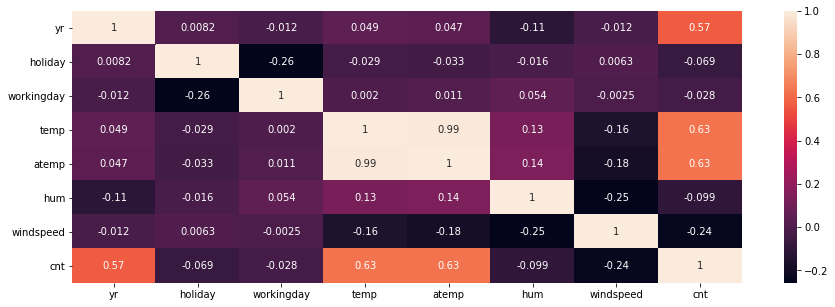

In [42]:
plt.figure(figsize=(15,5))
sns.heatmap(bike_data_new.corr(),annot=True)
plt.show()

- here as per the heatmap correlation
- 'temp' and 'atemp' has highest correlation with cnt 0.63
- 'yr' has next highest 0.57

## Creating dummy variables 

In [43]:
status = pd.get_dummies(bike_data_new[['weathersit','season','weekday','mnth']],drop_first=True)

In [44]:
status

,weathersit_Mist,weathersit_clear,season_spring,season_summer,season_winter,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
726,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
727,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
bike_data_new = pd.concat([bike_data_new,status],axis=1)

In [46]:
bike_data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [47]:
# deleting these columns a swe have created dummy varibales for them.

In [48]:
bike_data_new= bike_data_new.drop(['weathersit','season','weekday','mnth'],axis=1) 

In [49]:
bike_data_new.shape

(730, 30)

In [50]:
bike_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   weathersit_Mist   730 non-null    uint8  
 9   weathersit_clear  730 non-null    uint8  
 10  season_spring     730 non-null    uint8  
 11  season_summer     730 non-null    uint8  
 12  season_winter     730 non-null    uint8  
 13  weekday_mon       730 non-null    uint8  
 14  weekday_sat       730 non-null    uint8  
 15  weekday_sun       730 non-null    uint8  
 16  weekday_thu       730 non-null    uint8  
 1

In [51]:
bike_data_new.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Mist,weathersit_clear,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.336986,0.634247,...,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.473004,0.481971,...,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  Splitting the Data into Training and Testing Sets

In [52]:
df_train,df_test = train_test_split(bike_data_new,train_size=0.70,random_state=2)

In [53]:
df_train.shape

(510, 30)

In [54]:
df_test.shape

(220, 30)

In [55]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Mist,weathersit_clear,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
573,1,0,0,30.989153,34.88020,61.3333,10.542450,6685,0,1,...,0,0,0,1,0,0,0,0,0,0
267,0,0,1,26.000847,28.63185,84.5000,3.375406,5010,1,0,...,0,0,0,0,0,0,0,0,0,1
551,1,0,0,33.961653,37.62665,45.0833,9.791514,6207,0,1,...,0,0,0,1,0,0,0,0,0,0
236,0,0,0,28.050847,32.29270,77.1667,14.125811,3542,1,0,...,0,0,0,0,0,0,0,0,0,0
370,1,0,0,13.700847,17.01335,54.2083,11.249836,4098,0,1,...,0,0,1,0,0,0,0,0,0,0


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 573 to 168
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                510 non-null    int64  
 1   holiday           510 non-null    int64  
 2   workingday        510 non-null    int64  
 3   temp              510 non-null    float64
 4   atemp             510 non-null    float64
 5   hum               510 non-null    float64
 6   windspeed         510 non-null    float64
 7   cnt               510 non-null    int64  
 8   weathersit_Mist   510 non-null    uint8  
 9   weathersit_clear  510 non-null    uint8  
 10  season_spring     510 non-null    uint8  
 11  season_summer     510 non-null    uint8  
 12  season_winter     510 non-null    uint8  
 13  weekday_mon       510 non-null    uint8  
 14  weekday_sat       510 non-null    uint8  
 15  weekday_sun       510 non-null    uint8  
 16  weekday_thu       510 non-null    uint8  


In [57]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Mist,weathersit_clear,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.503922,0.031373,0.688235,20.178546,23.548760,62.903420,12.756710,4464.888235,0.335294,0.639216,...,0.094118,0.090196,0.082353,0.082353,0.076471,0.076471,0.078431,0.076471,0.082353,0.090196
std,0.500476,0.174494,0.463669,7.591605,8.263279,14.094806,5.149713,1950.430207,0.472557,0.480700,...,0.292279,0.286744,0.275172,0.275172,0.266010,0.266010,0.269113,0.266010,0.275172,0.286744
min,0.000000,0.000000,0.000000,2.424346,3.953480,18.791700,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.581240,16.319000,51.838325,9.136338,3012.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,19.902076,23.737200,63.083300,12.208539,4510.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.398587,72.958300,15.500919,6033.250000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'weathersit_Mist', 'weathersit_clear', 'season_spring',
       'season_summer', 'season_winter', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept'],
      dtype='object')

## Rescaling the features

In [59]:
scaler = MinMaxScaler()

In [60]:
num_list = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_list] = scaler.fit_transform(df_train[num_list])

In [61]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weathersit_Mist,weathersit_clear,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
573,1,0,0,0.868126,0.811910,0.549219,0.278224,0.766567,0,1,...,0,0,0,1,0,0,0,0,0,0
267,0,0,1,0.716524,0.647874,0.848305,0.057698,0.573861,1,0,...,0,0,0,0,0,0,0,0,0,1
551,1,0,0,0.958464,0.884012,0.339429,0.255118,0.711574,0,1,...,0,0,0,1,0,0,0,0,0,0
236,0,0,0,0.778826,0.743981,0.753631,0.388482,0.404970,1,0,...,0,0,0,0,0,0,0,0,0,0
370,1,0,0,0.342709,0.342857,0.457234,0.299990,0.468937,0,1,...,0,0,1,0,0,0,0,0,0,0


## Dividing the train set to X and y sets for Model Building

In [62]:
y_train = df_train.pop('cnt')
X_train = df_train

In [63]:
X_train.shape

(510, 29)

In [64]:
y_train.shape

(510,)

## RFE:

Using RFE (Recursive feature elimination) method to select the features in recursive method 

In [65]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weathersit_Mist', True, 1),
 ('weathersit_clear', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 5),
 ('season_winter', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', False, 12),
 ('weekday_sun', False, 13),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 6),
 ('mnth_aug', False, 11),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 8),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1)]

In [67]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'weathersit_Mist',
       'weathersit_clear', 'season_spring', 'season_winter', 'mnth_dec',
       'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept'],
      dtype='object')

In [68]:
X_train_rfe =X_train[cols]

In [69]:
X_train_rfe.shape

(510, 15)

# Building Linear Model

### Model 1

In [70]:
X_train_lm1 = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          8.17e-187
Time:                        12:07:33   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     494   BIC:                            -919.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1764      0.046  

In [72]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,351.98
2,temp,350.76
4,hum,14.53
7,weathersit_clear,13.65
6,weathersit_Mist,7.73
5,windspeed,5.37
8,season_spring,3.46
9,season_winter,2.72
0,yr,2.08
13,mnth_nov,1.72


## Model 2
- Here as per the observation atemp has both high p-value and high VIF value hence wee need to drop the value.
- dropping 'atemp' and rebuilding the model

In [73]:
X_train_new = X_train_rfe.drop(['atemp'],axis=1)

In [74]:
X_train_lm2 = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.37e-187
Time:                        12:08:21   Log-Likelihood:                 508.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     495   BIC:                            -923.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1768      0.046  

In [75]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,20.45
3,hum,14.37
6,weathersit_clear,13.40
5,weathersit_Mist,7.65
4,windspeed,5.21
7,season_spring,3.46
8,season_winter,2.71
0,yr,2.07
12,mnth_nov,1.72
10,mnth_jan,1.62


## Model 3
- Here as per the observation 'hum has high VIF value hence wee need to drop the value.
- dropping 'hum' and rebuilding the model

In [76]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [77]:
X_train_lm3 = sm.add_constant(X_train_new)


lr_3 = sm.OLS(y_train, X_train_lm3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.15e-183
Time:                        12:08:21   Log-Likelihood:                 496.49
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     496   BIC:                            -905.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0414      0.038  

In [78]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,13.71
5,weathersit_clear,13.39
4,weathersit_Mist,6.95
3,windspeed,5.21
6,season_spring,3.12
7,season_winter,2.43
0,yr,2.05
11,mnth_nov,1.69
9,mnth_jan,1.59
8,mnth_dec,1.49


## Model 4
- Here as per the observation temp and weathersit_clear have high VIF values but removing them at thi spoint can vary the results. Also they have high coefficeints.
- Hnec removing the next 'weathersit_Mist' with high VIF values
- dropping 'weathersit_Mist' and rebuilding the model

In [79]:
X_train_new = X_train_new.drop(["weathersit_Mist"], axis = 1)

In [80]:
X_train_lm4 = sm.add_constant(X_train_new)


lr_4 = sm.OLS(y_train, X_train_lm4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     184.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          1.75e-174
Time:                        12:08:21   Log-Likelihood:                 471.93
No. Observations:                 510   AIC:                            -917.9
Df Residuals:                     497   BIC:                            -862.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2357      0.027  

In [81]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.99
3,windspeed,4.74
4,weathersit_clear,2.87
5,season_spring,2.45
6,season_winter,2.27
0,yr,2.04
10,mnth_nov,1.67
8,mnth_jan,1.55
7,mnth_dec,1.45
9,mnth_jul,1.38


- All the values are now permissbile values.Hence we can consider this as final model

## Residual Analysis of the train data

In [83]:
y_train_pred = lr_4.predict(X_train_lm4)

In [84]:
res = y_train-y_train_pred

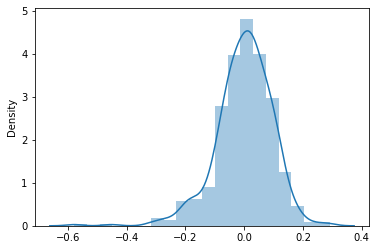

In [85]:
# plotting residual values on a distributionn plot
plt.figure()
sns.distplot(res,bins=20)
plt.show()

## Making Predictions Using the Final Model

In [86]:
num_list = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_list] = scaler.transform(df_test[num_list])

## Dividing into X_test and y_test

In [87]:
y_test = df_test.pop('cnt')
X_test = df_test

In [88]:
final_columns=X_train_new.columns
X_test=X_test[final_columns]

In [89]:
X_test_sm = sm.add_constant(X_test)

In [90]:
y_pred = lr_4.predict(X_test_sm)

## Model Evaluation

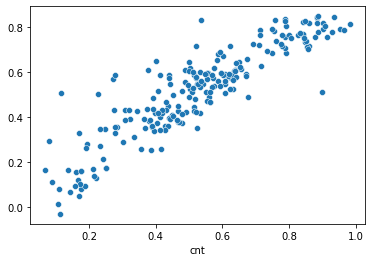

In [91]:
sns.scatterplot(y_test,y_pred)
plt.show()

- here equation for the best fitted line can be given as :

$ 
cnt = 0.2342 \times yr - 0.0748 \times holiday+ 0.3709 \times temp-0.1775 \times windspeed+0.0924 \times weathersit_clear-0.1359 \times season_spring+0.0555 \times season_winter-0.0697 \times mnth_dec-0.0466 \times mnth_jan-0.0465 \times mnth_jul-0.0727 \times mnth_nov+0.0445 \times mnth_sept 
$

## finding r-sqaured and adjusted r-sqaured values for  test data

In [99]:
test_r2 = r2_score(y_true = y_test,y_pred = y_pred )

In [100]:
test_r2

0.7990063880792578

In [94]:
n = X_test.shape[0]

In [95]:
p = X_test.shape[1]

In [101]:
r2 = test_r2

In [102]:
adjusted_test_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_test_r2

0.7873545844896496

## Final Observations

- The highest coefficients are :
1. temp	0.3784	
2. yr	0.2311
3. weathersit_clear	0.0924


- these are all positive values so increase in mentioned values inceases the same on the target variable.
- there are some negative values so increase of those values decreases the target variable by same amount


### After final model these are the values for both train and test sets:
-  train r2 = 0.817
-  train adjusted r2 = 0.813
- const= 0.2357 
-  test r2 = 0.7990063880792578
- adjuster r2 = 0.7873545844896496


- this seems to be good module with the final model values.

### the categorical fetaures that can help the company increase demand are as follows:
- for months May to September has high demand
- weekdays are more in demand than weekends
- seasons summer and fall are highest demand for bikes